## Zapisz kopię pliku na dysku iz mień jego nazwę *Python_czyszczenieDanych_ImieNazwisko.jpynb*

Celem tego raportu jest zbadanie związku między budżetem filmu a generowanym przychodem. Analiza ta ma na celu zrozumienie, czy wyższy budżet produkcji filmowej przekłada się na większy dochód na rynku kinowym. Dane użyte w analizie pochodzą z różnych filmów i obejmują informacje dotyczące budżetu produkcji oraz generowanego przychodu.

Używany zbiór składa się z 13 kolumn:
--------------------------------------
Jakościowe:
-----------

Rank - pozycja w top 500

release_date - data premiery

title - tytuł filmu

URL - URL filmu

Mpaa - zakres wiekowy

genere - gatuenk

year - rok produkcji


Ilościowe:
-------------

production_cost - budżet

domestic_gross - przychód w kraju produkcji

worldwide_gross - przychód ogólnoświatowy

opening_weekend - przychód w weekend premiery

theaters - ilość kin, które miały premierę

runtime - długość filmu

Zmienna objaśniana - worldwide_gross
------------------------------------
Zmienna objaśniające - Mpaa, genere, production_cost, theaters, rumtime
-----------------------------------------------------------------------

## Wczytaj biblioteki:
- numpy
- pandas

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt

## Wczytujemy plik "top-500-movies.csv" i wyświetlamy 10 pierwszych wierszy

In [2]:
file_path = 'top-500-movies.csv'
movies_df = pd.read_csv(file_path)

def display_interactive_table(dataframe, num_rows=10):
    display(HTML(dataframe.head(num_rows).to_html()))

display_interactive_table(movies_df)

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Tides#tab=summary,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=summary,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0
5,6,2007-05-24,Pirates of the Caribbean: At World’s End,/movie/Pirates-of-the-Caribbean-At-Worlds-End#tab=summary,300000000,309420425,960996492,114732820.0,PG-13,Adventure,4362.0,167.0,2007.0
6,7,2017-11-13,Justice League,/movie/Justice-League-(2017)#tab=summary,300000000,229024295,655945209,93842239.0,PG-13,Action,4051.0,121.0,2017.0
7,8,2015-10-06,Spectre,/movie/Spectre#tab=summary,300000000,200074175,879500760,70403148.0,PG-13,Action,3929.0,148.0,2015.0
8,9,2023-07-11,Mission: Impossible Dead Reckoning Part One,/movie/Mission-Impossible-Dead-Reckoning-Part-One-(2023)#tab=summary,290000000,0,0,NaN,NaN,Action,NaN,NaN,2023.0
9,10,2019-12-18,Star Wars: The Rise of Skywalker,/movie/Star-Wars-The-Rise-of-Skywalker-(2019)#tab=summary,275000000,515202542,1072848487,177383864.0,PG-13,Adventure,4406.0,142.0,2019.0


Usuwamy wszystkie wartości Nan, NULL i 0

In [3]:
cleaned_df = movies_df.dropna()
cleaned_df = cleaned_df[(cleaned_df != 0).all(axis=1)]
display_interactive_table(cleaned_df, 5)

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Tides#tab=summary,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=summary,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0


Porządkujemy zbiór względem zmiennej objaśnianej (worldwide_gross)
-----------------------------------------------

In [4]:
sorted_df = cleaned_df.sort_values(by='worldwide_gross', ascending=False)

display_interactive_table(sorted_df)

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
24,25,2009-12-17,Avatar,/movie/Avatar#tab=summary,237000000,785221649,2910370905,77025481.0,PG-13,Action,3461.0,162.0,2009.0
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
48,49,1997-12-18,Titanic,/movie/Titanic-(1997)#tab=summary,200000000,659363944,2207986545,28638131.0,PG-13,Drama,3265.0,194.0,1997.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=summary,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0
46,47,2021-12-14,Spider-Man: No Way Home,/movie/Spider-Man-No-Way-Home-(2021)#tab=summary,200000000,814108407,1912775610,260138569.0,PG-13,Action,4336.0,148.0,2021.0
37,38,2015-06-09,Jurassic World,/movie/Jurassic-World#tab=summary,215000000,652306625,1669979967,208806270.0,PG-13,Action,4291.0,124.0,2015.0
14,15,2019-07-11,The Lion King,/movie/Lion-King-The-(Live-Action)-(2019)#tab=summary,260000000,543638043,1647778651,191770759.0,PG,Adventure,4802.0,118.0,2019.0
29,30,2012-04-25,The Avengers,/movie/Avengers-The-(2012)#tab=summary,225000000,623357910,1515100211,207438708.0,PG-13,Action,4349.0,143.0,2012.0
89,90,2015-04-01,Furious 7,/movie/Furious-7#tab=summary,190000000,353007020,1514553486,147187040.0,PG-13,Action,4022.0,137.0,2015.0


### Liczmy średnią artmetyczną zbioru i medianę

In [5]:
mean_worldwide_gross = sorted_df['worldwide_gross'].mean()

median_worldwide_gross = sorted_df['worldwide_gross'].median()

print("Średnia dla worldwide_gross:", mean_worldwide_gross)
print("Mediana dla worldwide_gross:", median_worldwide_gross)

Średnia dla worldwide_gross: 488126242.4451477
Mediana dla worldwide_gross: 377875827.5


### Wyfiltruj komórki obejmujące kolumny od 2 do 4 i wiersze od 1 do 5.

In [6]:
std_dev_gross = sorted_df['worldwide_gross'].std()
variance_gross = sorted_df['worldwide_gross'].var()
iqr_gross = sorted_df['worldwide_gross'].quantile(0.75) - movies_df['worldwide_gross'].quantile(0.25)
print("\nMiary rozproszenia dla zmiennej objaśnianej (Gross):")
print("Odchylenie standardowe:", std_dev_gross)
print("Wariancja:", variance_gross)
print("Rozstęp międzykwartylowy (IQR):", iqr_gross)


Miary rozproszenia dla zmiennej objaśnianej (Gross):
Odchylenie standardowe: 383418474.682511
Wariancja: 1.4700972672786333e+17
Rozstęp międzykwartylowy (IQR): 440271523.0


### Tworzymy wykres liniowy wraz z linią trendu dla zmiennych production_cost i worldwide_gross

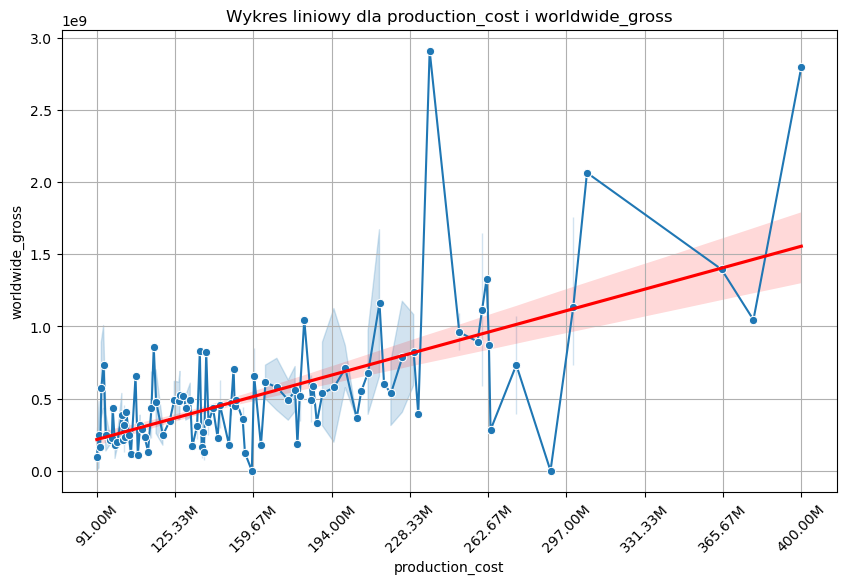

In [7]:
x_labels = np.linspace(movies_df['production_cost'].min(), movies_df['production_cost'].max(), num=10)
x_labels_millions = x_labels / 1e6

plt.figure(figsize=(10, 6))
sns.lineplot(x='production_cost', y='worldwide_gross', data=movies_df, marker='o')
plt.title('Wykres liniowy dla production_cost i worldwide_gross')
plt.xlabel('Koszt produkcji (w milionach)')
plt.ylabel('Przychód globalny')
plt.xticks(ticks=x_labels, labels=[f'{x:.2f}M' for x in x_labels_millions], rotation=45)  # Ustaw etykiety na osi x jako wartości kosztów produkcji w milionach
plt.grid(True)

sns.regplot(x='production_cost', y='worldwide_gross', data=movies_df, scatter=False, color='red')

plt.show()


### Na wykresie widzimy trend wzrostowy, który mówi nam, że budżet ma znaczący wpływ na przychody z filmu

### Sprawdzmy jaki wpływ ma gatunek na przychód filmu

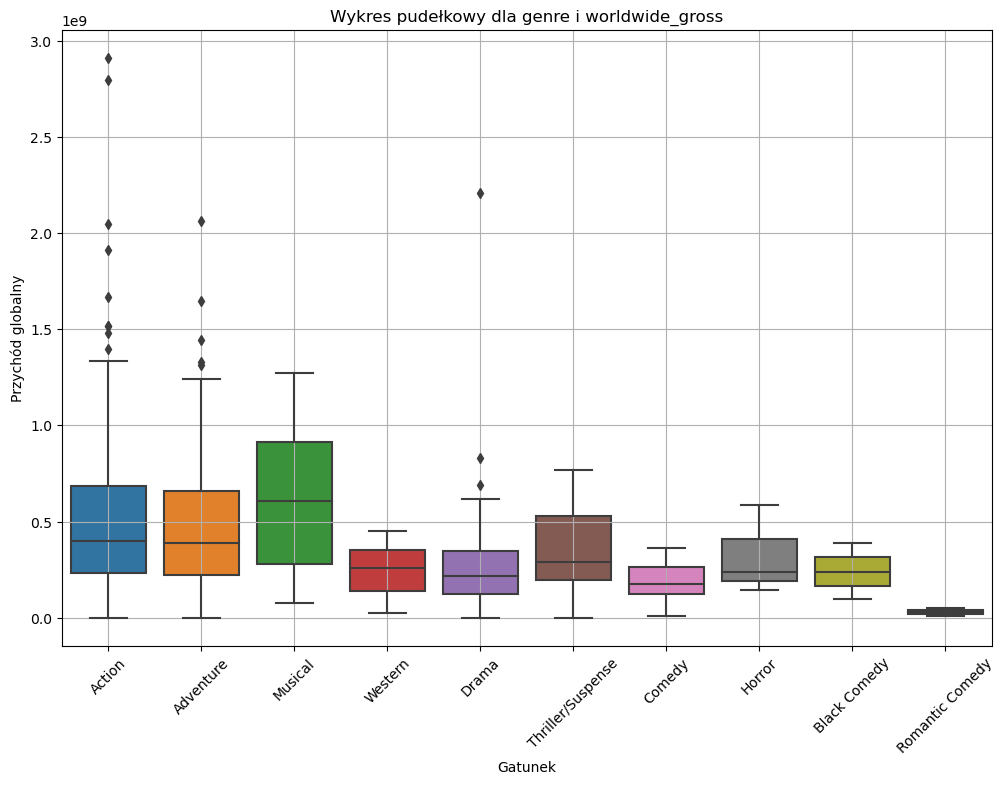

In [8]:
# Stwórz wykres pudełkowy
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='worldwide_gross', data=movies_df)
plt.title('Wykres pudełkowy dla genre i worldwide_gross')
plt.xlabel('Gatunek')
plt.ylabel('Przychód globalny')
plt.xticks(rotation=45)  # Obróć etykiety osi x dla lepszej czytelności
plt.grid(True)  # Dodaj siatkę
plt.show()


### Możemy zauważyć, że największe przychody generują filmy z gatunku:
### - Akcja
### - Przygodowe
### - Musicale

#Objaśnienie osi x
- G => Film przeznaczony dla wszsytkich
- PG => Film przeznaczony dla wszystkich pod warunkiem kontroli rodzicielskiej
- PG-13 => Film może zawierać materiały nieodpowiednie dla dzieci poniżej 13. roku życia
- R => Osoby poniżej 17. rż mogą oglądać film wyłącznie pod opieką opiekuna lub rodzica